# Submission Dicoding Analisis Data Menggunakan Python : Bike Sharing Dataset
- Nama : Muhammad Nandaarjuna Fadhillah
- Email : muhammadnandaaf@gmail.com
- Id Dicoding : muhammadnanda

## Menentukan Pertanyaan Bisnis
- Bagaimana pengaruh cuaca terhadap penyewa sepeda?
- Apakah terdapat pengaruh hari libur, hari kerja, dan hari biasa terhadap penggunaan sepeda?
- Apakah terdapat tren peningkatan atau penurunan penggunaan sepeda setiap bulan?

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Wrangling

### Gathering Data CSV
mengumpulkan semua data yang dibutuhkan

In [2]:
day_df = pd.read_csv("day.csv")
hour_df = pd.read_csv("hour.csv")

### Load Data (Menampilkan baris awal dari dataframe)

In [3]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data (Melihat Informasi dataframe)
Menilai kualitas dari seluruh data yang akan digunakan

#### Assessing Dataframe Day

In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
print("Jumlah Duplikasi Dataset Day: ",day_df.duplicated().sum())

Jumlah Duplikasi Dataset Day:  0


#### Check Parameter Statistik Dataframe Day

In [8]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Assessing Dataframe Hour

In [9]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
print("Jumlah Duplikasi Dataset Hour: ",hour_df.duplicated().sum())

Jumlah Duplikasi Dataset Hour:  0


#### Check Parameter Statistik Dataset Hour

In [12]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [13]:
# Mengubah nama kolom
day_df.rename(columns={
    'dteday':'dateDay',
    'yr':'year',
    'mnth':'month',
    'hr':'hour',
    'hum':'humidity',
    'tempt':'temperature',
    'weathersit':'weath_cond',
    'cnt':'rent_count'
}, inplace = True)
day_df.head()

,instant,dateDay,season,year,month,holiday,weekday,workingday,weath_cond,temp,atemp,humidity,windspeed,casual,registered,rent_count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [14]:
# Mengubah keterangan cuaca, bulan, hari, musim
day_df['weath_cond'] = day_df['weath_cond'].map({
    1 : 'Clear/Partly Cloudy',
    2 : 'Mist/Cloudy',
    3 : 'Light Snow/Rain/Scattered Clouds',
    4 : 'Worst Weather'
})

day_df['month'] = day_df['month'].map({
    1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'Mei', 6:'Jun',
    7:'Jul', 8:'Aug', 9:'Sep', 10:'Okt', 11:'Nov', 12:'Dec'
})

day_df['weekday'] = day_df['weekday'].map({
    0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 
    4:'Thu', 5:'Fri', 6:'Sat'
})

day_df['season'] = day_df['season'].map({
    1:'springer', 2:'summer', 
    3:'fall', 4:'winter'
})

day_df['workingday'] = day_df['workingday'].map({
    0:'weekend/non-workday',
    1:'workday'
})

day_df['year'] = day_df['year'].map({
    0:'2011',
    1:'2012'
})

In [15]:
# Mengubah Tipe Data Kolom yang diperlukan ke Categorical 
day_df['season'] = day_df.season.astype('category')
day_df['year'] = day_df.year.astype('category')
day_df['month'] = day_df.month.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weath_cond'] = day_df.weath_cond.astype('category')

# Mengubah Tipe Data Object ke Datetime
day_df['dateday'] = pd.to_datetime(day_df.dateDay)
day_df.head()

,instant,dateDay,season,year,month,holiday,weekday,workingday,weath_cond,temp,atemp,humidity,windspeed,casual,registered,rent_count,dateday
0,1,2011-01-01,springer,2011,Jan,0,Sat,weekend/non-workday,Mist/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985,2011-01-01
1,2,2011-01-02,springer,2011,Jan,0,Sun,weekend/non-workday,Mist/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801,2011-01-02
2,3,2011-01-03,springer,2011,Jan,0,Mon,workday,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349,2011-01-03
3,4,2011-01-04,springer,2011,Jan,0,Tue,workday,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562,2011-01-04
4,5,2011-01-05,springer,2011,Jan,0,Wed,workday,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600,2011-01-05


In [16]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dateDay     731 non-null    object        
 2   season      731 non-null    category      
 3   year        731 non-null    category      
 4   month       731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weath_cond  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  humidity    731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  rent_count  731 non-null    int64         
 16  dateday     731 non-null  

## Exploratory Data Analysis (EDA)

### Eksplor Dataframe Day

1. Hubungan antara penyewa (secara casual dan registered) dan cuaca

In [17]:
day_df.groupby(by='weath_cond').agg({
    'rent_count':['max','min','mean','sum']
})

C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_5812\2410611778.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='weath_cond').agg({


rent_count                           
                                        max  min         mean      sum
weath_cond                                                            
Clear/Partly Cloudy                    8714  431  4876.786177  2257952
Light Snow/Rain/Scattered Clouds       4639   22  1803.285714    37869
Mist/Cloudy                            8362  605  4035.862348   996858

dari hasil diatas didapat hubungan antara penyewa dan cuaca adalah penyewa lebih banyak menyewa sepeda saat keadaan cuaca berawan dan paling sedikit ketika cuaca sedang mendung atau berkabut

2. Hubungan antara penyewa dan workingday

In [18]:
day_df.groupby(by='workingday').agg({
    'rent_count':['max','min','mean','sum']
})

C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_5812\1169599353.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='workingday').agg({


rent_count                           
                           max  min         mean      sum
workingday                                               
weekend/non-workday       8714  605  4330.168831  1000269
workday                   8362   22  4584.820000  2292410

dari hasil diatas didapat hubungan antara penyewa dan hari kerja dimana penyewa lebih banyak menyewa sepeda ketika hari kerja daripada weekend/hari libur

3. Hubungan antara penyewa dan musim

In [19]:
day_df.groupby(by='weekday').agg({
    'rent_count':['max','min','mean','sum']
})

C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_5812\3163890183.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='weekday').agg({


rent_count                           
               max   min         mean     sum
weekday                                      
Fri           8362  1167  4690.288462  487790
Mon           7525    22  4338.123810  455503
Sat           8714   627  4550.542857  477807
Sun           8227   605  4228.828571  444027
Thu           7804   431  4667.259615  485395
Tue           7767   683  4510.663462  469109
Wed           8173   441  4548.538462  473048

dari hasil diatas didapat hubungan penyewa terbanyak menyewa sepeda pada hari jum'at dan paling sedikit pada hari rabu

4. Hubungan antara penyewa dan musim

In [20]:
day_df.groupby(by='season').agg({
    'rent_count':['max','min','mean','sum'],
    'registered':['sum'],
    'casual':['sum']
})

C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_5812\4144531118.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='season').agg({


rent_count                             registered  casual
                max   min         mean      sum        sum     sum
season                                                            
fall           8714  1115  5644.303191  1061129     835038  226091
springer       7836   431  2604.132597   471348     410726   60622
summer         8362   795  4992.331522   918589     715067  203522
winter         8555    22  4728.162921   841613     711831  129782

In [21]:
day_df.groupby(by="season").rent_count.nunique().sort_values(ascending=False)

C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_5812\1164470595.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by="season").rent_count.nunique().sort_values(ascending=False)


season
fall        188
summer      182
springer    179
winter      176
Name: rent_count, dtype: int64

dari hasil diatas didapat bahwa penyewa sepeda casual dan registered lebih banyak menyewa sepeda pada saat musim gugur dan paling sedikit ketika musim dingin

In [22]:
day_df.groupby(by="month").rent_count.nunique().sort_values(ascending=False)

C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_5812\2982679818.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by="month").rent_count.nunique().sort_values(ascending=False)


month
Aug    62
Dec    62
Jan    62
Jul    62
Mei    62
Okt    62
Apr    60
Jun    60
Mar    60
Nov    60
Sep    60
Feb    57
Name: rent_count, dtype: int64

dari hasil diatas bulan agustus paling banyak mendapatkan pelanggan penyewa baik penyewa casual maupun penyewa registered

In [27]:
all_data_csv = pd.merge(
    left = day_df,
    right = hour_df,
    how = "left",
    left_on = "instant",
    right_on = "instant"
)

In [28]:
all_data_csv.to_csv("all_data.csv", index=False)

## Explanatory Analaysis and Data Visualization 

### Pertanyaan 1 : Bagaimana pengaruh cuaca terhadap penyewa sepeda?

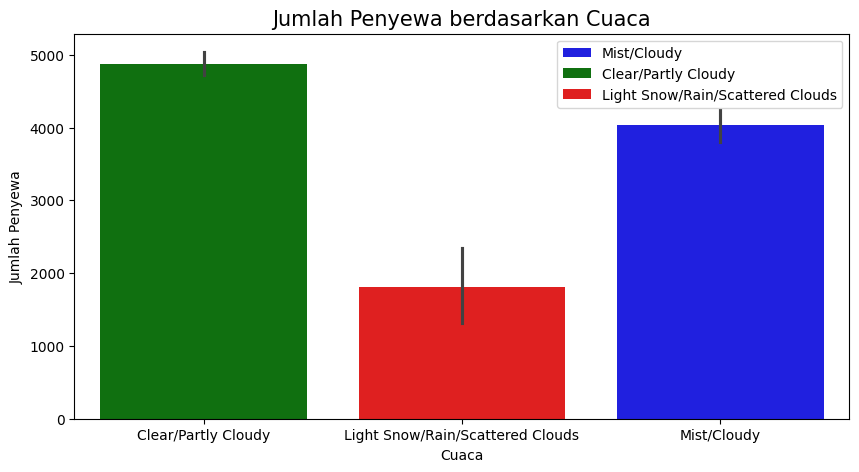

In [23]:
colors = ['blue', 'green', 'red']
plt.figure(figsize=(10,5))

for i, cond in enumerate(day_df['weath_cond'].unique()):
    subset = day_df[day_df['weath_cond'] == cond]
    sns.barplot(
        y="rent_count",
        x="weath_cond",
        data=subset,
        color=colors[i], 
        label=cond
    )
plt.title("Jumlah Penyewa berdasarkan Cuaca", loc="center", fontsize=15)
plt.ylabel("Jumlah Penyewa")
plt.xlabel("Cuaca")
plt.show()

Dari hasil visualisasi diatas dapat disimpulkan bahwa terdapat hubungan antara penyewa sepeda dan cuaca, dimana penyewa sepeda paling banyak menyewa sepeda pada saat cuaca sedang berawan, dan paling sedikit menyewa sepeda ketika cuaca sedang buruk seperti bersalju dan hujan

### Pertanyaan 2 : Apakah terdapat pengaruh hari libur, hari kerja, hari biasa terhadap penggunaan sepeda?

C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_5812\186323308.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="workingday", y="rent_count", data=day_df, palette=colors, ax=ax[0])
C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_5812\186323308.py:5: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.barplot(x="workingday", y="rent_count", data=day_df, palette=colors, ax=ax[0])
C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_5812\186323308.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="weekday", y="rent_count", data=day_df, palette=colors, ax=ax[1])
C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_5812\186323308.py:11: UserWarning: 


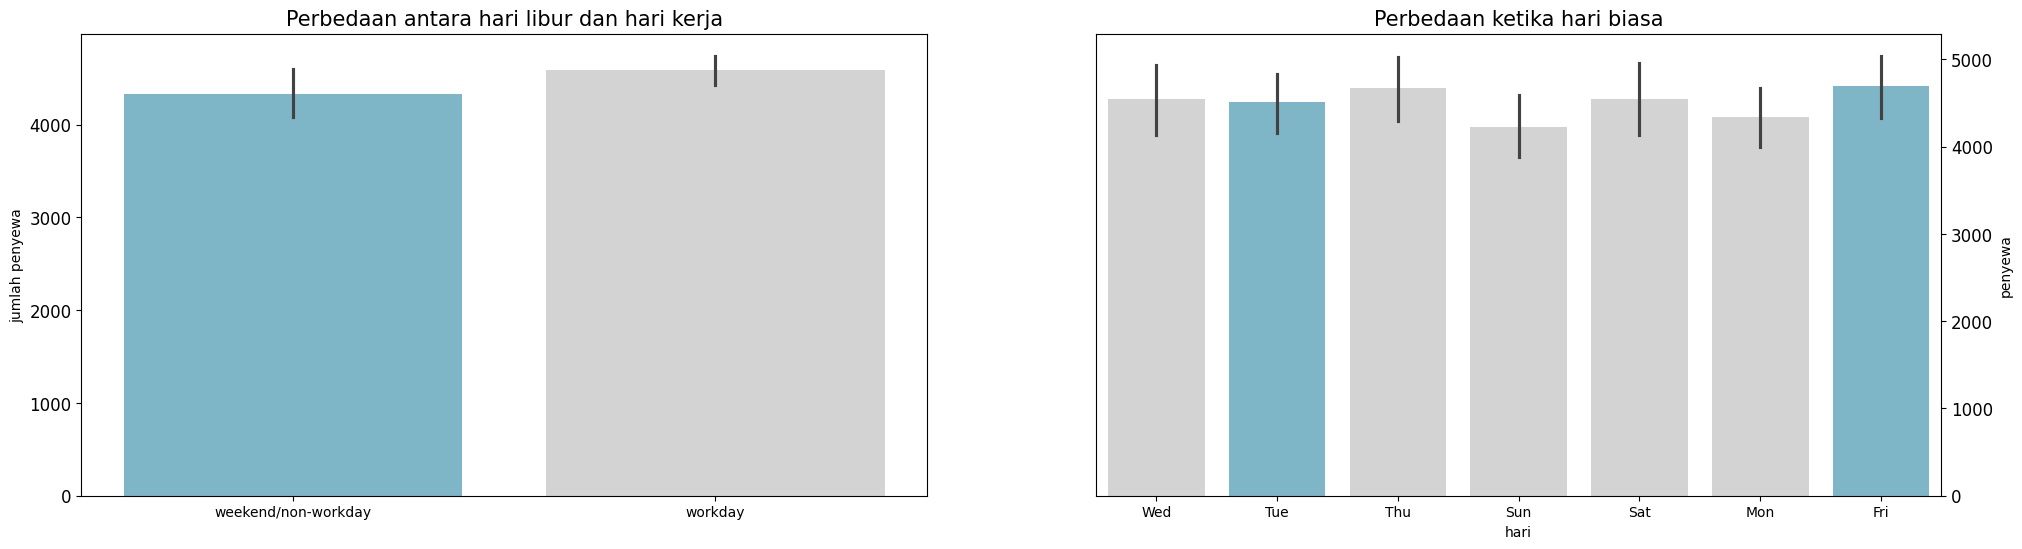

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="workingday", y="rent_count", data=day_df, palette=colors, ax=ax[0])
ax[0].set_ylabel("jumlah penyewa")
ax[0].set_xlabel(None)
ax[0].set_title("Perbedaan antara hari libur dan hari kerja", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="weekday", y="rent_count", data=day_df, palette=colors, ax=ax[1])
ax[1].set_ylabel("penyewa")
ax[1].set_xlabel("hari")
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Perbedaan ketika hari biasa", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)
plt.show()

Dari Hasil visualisasi diatas terdapat perbedaan jumlah penyewa sepeda antara hari kerja, hari libur, dan hari biasa. Perbandingan jumlah penyewa ketika hari kerja lebih banyak sekitar lebih dari 4000 jumlah penyewa daripada ketika hari libur. Dan perbandingan ketika hari biasa jumlah penyewa lebih banyak menyewa sepeda pada hari jum'at.

### Pertanyaan 3 : Apakah terdapat tren peningkatan atau penurunan penggunaan sepeda setiap bulan?

C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_5812\3011728685.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_counts = day_df.groupby(by=["month","year"]).agg({


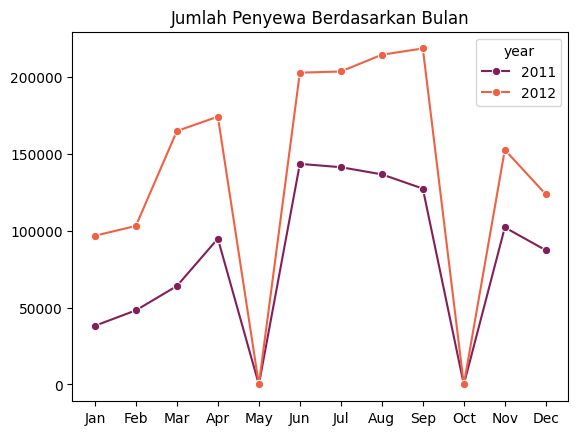

In [25]:
day_df['month'] = pd.Categorical(day_df['month'], categories=
    ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
    ordered=True)

monthly_counts = day_df.groupby(by=["month","year"]).agg({
    "rent_count": "sum"
}).reset_index()

sns.lineplot(
    data=monthly_counts,
    x="month",
    y="rent_count",
    hue="year",
    palette="rocket",
    marker="o"
)

plt.title("Jumlah Penyewa Berdasarkan Bulan")
plt.xlabel(None)
plt.ylabel(None)
plt.show()

Dari hasil visualisasi diatas dapat disimpulkan bahwa penyewaan sepeda mengalami peningkatan drastis pada tahun 2012 pada bulan juni dan mengalami penurunan pada bulan mei dan oktober. dapat dilihat juga penyewaan sepeda mengalami nilai maksimal pada bulan september 2012. Pada tahun 2011 mengalami kenaikan atau peningkatan di bulan juni dan penurunan di bulan mei dan oktober

## Conclusion

- Kesimpulan Pertanyaan 1 : Cuaca cukup berpengaruh untuk penyewa sepeda karna dapat terlihat jelas penyewa sepeda lebih banyak menyewa sepeda ketika cuaca sedang bagus dan berawan, sebanyak lebih dari 4000 penyewa sepeda menyewa ketka cuaca sedang bagus. Dan paling sedikit penyewa sepeda menyewa ketika cuaca hujan, badai, atau bersalju, sekitar kurang dari 2000 penyewa menyewa sepeda ketika cuaca buruk.

- Kesimpulan Pertanyaan 2 : Pengaruh antara hari libur, hari kerja, dan hari biasa. Terdapat sedikit perbedaan ketika hari libur dan hari kerja dimana penyewa sepeda lebih banyak menyewa sepeda ketika hari kerja dibandingkan hari libur. dan hari biasa penyewa lebih banyak menyewa pada hari jum'at.
  
- Kesimpulan Pertanyaan 3 : gelombang awal peningkatan penyewaan sepeda pada tahun 2011 terjadi ketika bulan april dan mengalami penurunan ketika bulan mei. Peningkatan tertinggi yang dialami terjadi pada bulan juni dan penurunan paling rendah terjadi pada bulan mei dan oktober. Pada tahun 2012 peningkatan tertinggi  terjadi pada bulan september dan penurunan terendah terjadi pada bulan mei dan oktober.